# Creates an  images visualizing the sequence of a video
We'll load the video/image sequence and create a put the frames side by side in a single image.

In [3]:
!ls ../dataset_casper
multimodal_data = "../dataset_casper/"

constant-test	     V1-A4-C1-O4-X  V1-A4-C6-O9    V2-A4-C6-O4-X  V6-A4-C1-O9
generalization-test  V1-A4-C1-O9    V2-A4-C1-O4-X  V2-A4-C6-O9	  V6-A4-C6-O4-X
other_stuff	     V1-A4-C6-O4-X  V2-A4-C1-O9    V6-A4-C1-O4-X  V6-A4-C6-O9


In [4]:
v1 = multimodal_data + "V1-A4-C1-O4-X/"
random_sequence = v1+"training/sequence_0000/"

In [5]:
import glob
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def get_image_paths(path):
    image_paths = glob.glob(os.path.join(path, "*.png"))
    image_paths.sort()
    return image_paths

def get_images(image_paths, stride=1):
    images = []
    for i in range(0, len(image_paths), stride):
        path = image_paths[i]
        images.append(cv2.imread(path))
    return images

def show_images(images):
    for image in images:
        plt.imshow(image)
        plt.show()

def combine_images(images):
    combined_image = np.zeros((images[0].shape[0], images[0].shape[1]*len(images), 3), dtype=np.uint8)
    for i in range(len(images)):
        combined_image[:, i*images[0].shape[1]:(i+1)*images[0].shape[1], :] = images[i]
    return combined_image

def combine_top_down(images):
    combined_image = np.zeros((images[0].shape[0]*len(images), images[0].shape[1], 3), dtype=np.uint8)
    for i in range(len(images)):
        combined_image[i*images[0].shape[0]:(i+1)*images[0].shape[0], :, :] = images[i]
    return combined_image

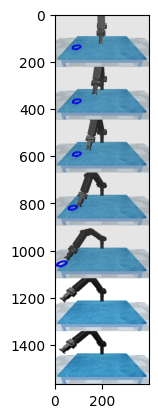

In [7]:
img_paths = get_image_paths(random_sequence)
imgs = get_images(img_paths, stride=3)
#show_images(imgs)
combined_img = combine_top_down(imgs)
plt.imshow(combined_img)

In [8]:
cv2.imshow("combined", combined_img)
cv2.waitKey(0)

32

In [9]:
cv2.destroyAllWindows()

In [10]:
save_dir = "/home/ramtin/code/uni-thesis/paper/datasets/"
cv2.imwrite(save_dir+"combined_vq_top_down.png", combined_img)

True

In [49]:
arcogen_vid = "/home/ramtin/code/uni-thesis/CATER/generate/Out/images/ARC-GEN_new_000026.avi"
cap = cv2.VideoCapture(arcogen_vid)
print(cap.isOpened())

True


In [50]:

frames = []
for i in range(30):
    ret, frame = cap.read()
    if i%4 == 0:
        frames.append(frame)
        cv2.imshow("frame", frame)
        cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
combined_img = combine_images(frames)

In [52]:
cv2.imshow("combined", combined_img)
cv2.waitKey(0)

32

In [54]:
cv2.destroyAllWindows()

In [53]:
cv2.imwrite(save_dir+"combined_arcogen.png", combined_img)

True

In [58]:
def combine_top_down(images):
    combined_image = np.zeros((images[0].shape[0]*len(images), images[0].shape[1], 3), dtype=np.uint8)
    for i in range(len(images)):
        combined_image[i*images[0].shape[0]:(i+1)*images[0].shape[0], :, :] = images[i]
    return combined_image

In [59]:
combined_top_down = combine_top_down(frames)

In [60]:
cv2.imshow("combined", combined_top_down)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [61]:
cv2.imwrite(save_dir+"combined_top_down.png", combined_top_down)

True